# Intro to numpy arrays
Why numpy arrays rather than the standard python iterables and `for` loops?
- Readability
- Performance

Two key concepts of today:
- vectorization - perform same operation on every element of array. Removes need for `for` loops
- broadcasting - perform vectorized calculation with two arrays (which can be different shapes)

Differences between numpy arrays and python lists (built-in types):
- numpy arrays (`ndarray` objects) must be homogeneous
- ndarray objects have a fixed size at initialization -> changing them makes a new array and deletes the old one

Relevant properties of ndarray:
- ndarray.ndim
- ndarray.shape
- ndarray.size
- ndarray.dtype

It's worth having a look at the numpy documentation, there is a lot more than we can cover!
- https://numpy.org/doc/stable/user/whatisnumpy.html
- https://numpy.org/doc/stable/user/quickstart.html

In [ ]:
import numpy as np

## Creating 1D arrays

In [ ]:
arr1 = np.arange(15)
print(arr1)

With `arange` you can specify the step size (here it is 2).

In [ ]:
arr2 = np.arange(3,25,2)
print(arr2)

In [ ]:
np.array([])

You can also create a numpy array with specific values by passing in a python list or tuple.

In [ ]:
a = np.array([2, 3, 4])
print(a)

But remember the brackets!

In [ ]:
a = np.array(2, 3, 4)
print(a)

In [ ]:
np.full(10,2.5)

In [ ]:
np.ones(10) # Same as np.full(10,1.)

In [ ]:
np.zeros(10)# Same as np.full(10, 0.)

In [ ]:
np.zeros(0) # Same as np.array([])

You can specify the data type using dtype.

In [ ]:
print(np.ones(10, dtype=int))
print(np.ones(10))
print(np.ones(10, dtype=complex))

In [ ]:
# Check the size of an array
print(arr1)
print(arr1.size)

`arange` is useful, but it is hard to predict the number of elements in the array (why could this be?). `linspace` allows you to set this, by specifying the bounds and the number of elements you want.

In [ ]:
np.linspace(10,100,50)

In [ ]:
print(arr1)
arr4 = np.concatenate([arr1,arr1])
print(arr4)

## Large numpy arrays

In [ ]:
print(np.arange(9000))

You can insist on printing everything using `sys`.

In [ ]:
import sys

np.set_printoptions(threshold=sys.maxsize) 
print(np.arange(9000))

## Indexing in 1D

In [ ]:
print(arr4)
print(arr4[4])

In [ ]:
print(arr4[2:6])

In [ ]:
print(arr4[:3]) # Same as arr4[0:3]

In [ ]:
print(arr4[3:])

In [ ]:
print(arr4[:]) # Same as arr4

In [ ]:
print(arr4[:-1]) # Doesn't contain the last one!

## Simple array operations

In [ ]:
atens = np.linspace(10,100,10)
print(atens)

Here we see vectorization at work!

In [ ]:
print(atens * 0.01)

In [ ]:
# These two lines create the same array:
atest1 = np.zeros(20) + 3.
atest2 = np.full(20, 3.)
print(atest1)
print(atest2)

Here we see broadcasting at work (as well as vectorization)!

In [ ]:
print(arr1)
asquare = arr1 ** 2
print(asquare)
aneg = -asquare + arr1
print(aneg)

In [ ]:
# Note that this is fine...
print(np.arange(10) + np.arange(10))

# ...but this results in an error:
#print(np.arange(10) + np.arange(12))

val_increase = 3.0
print(np.arange(10) + val_increase)

You can see from the examples above that the array dimensions need to match, or one of the arrays must have dimension 1.

## Comparison operates on an element-by-element basis!

In [ ]:
print(aneg)
islarge = aneg > -100
print(islarge)

## Aggregate functions

In [ ]:
# Sum
arr3 = np.arange(10)
print(arr3)
np.sum(arr3)

In [ ]:
# Product
arr5 = np.linspace(3.,5.,3)
print(arr5)
arr6 = np.prod(arr5)
print(arr6)

In [ ]:
# Calculate average of x**2 between -1 and 5 using linspace, sum, and size
s=np.linspace(-1,5,1000)
b=s**2
SUM=sum(b)
SIZE=np.size(b)
MEAN=SUM/SIZE
print(f"Calculating the mean by hand", MEAN)
print(f"Using the mean method", b.mean())

In [ ]:
print(arr5)
np.mean(arr5), np.min(arr5), np.max(arr5)

##### Side note: inside math operations, `True` has value 1 and `False` 0

In [ ]:
print(f"{True + False=}")
print(f"{True * False=}")
print(f"{True + True=}")
print(f"{True * np.pi=}")
print(f"{False * np.pi=}")

This means we can use `np.sum` to count how many elements fulfill our criterion:

In [ ]:
print(aneg)
print(aneg > -40)
count = np.sum(aneg > -40)
print(f"{count} numbers above -40.")

In [ ]:
#any requires one true value to be true, all requires all values to be true to be true
print(aneg)
print(np.any(aneg < -20))
print(np.any(aneg < -200))
print(np.all(aneg < 10))
print(np.all(aneg < 0))
print(np.all(aneg <= 0))

How can we check that arrays atest1 and atest2 are the same?

In [ ]:
print(atest1)
print(atest2)
np.all(atest1 == atest2)

## Moving up to $n$ dimensions

In [ ]:
print(atest1)
print(atest1.shape)
print(atest1.size)

In [ ]:
print(atest1)
arr2d = atest1.reshape(4,5) # First number is number of rows, second is number of columns
print(arr2d)
print(arr2d.shape)
# arr2d_2 = atest1. reshape(3,6)

In [ ]:
np.zeros((5,5))
# same as :
# np.zeros(25).reshape(5,5)

In [ ]:
ran2d = np.arange(100).reshape(10,10)
print(ran2d)

In [ ]:
rand2d_tr = np.transpose(ran2d)
print(rand2d_tr)

In [ ]:
print(ran2d.shape, ran2d.size)

In numpy, indexing doesn't have to be done dimension by dimension, like with lists:

In [ ]:
#row, column
print(ran2d[2][1])
print(ran2d[1][2])

Instead, we can access elements directly with multiple indices (faster and more readable)

In [ ]:
#row, column
ran2d[2,1]

We can also flatten the multi-dimensional array out with the ravel method.

In [ ]:
print(rand2d_tr.ravel())

### With this syntax I can also access slices of my arrays along any axis, as well as "chunks":

In [ ]:
print(ran2d)

In [ ]:
hslice = ran2d[1,:] # Same as ran2d[1] (same as with a list)
print(hslice)

In [ ]:
vslice = ran2d[:,1] # Not so straightforward with lists!
print(vslice)

Create a 3D array from np.arange(100) 

In [ ]:
ran3d = ran2d.reshape(2,5,10) 
print(ran3d)

What parts of my 3D matrix do these lines of code access?

In [ ]:
ran3d[0,:,:]

In [ ]:
ran3d[:,0,:]

In [ ]:
ran3d[:,:,0]

## Operating along different axes

In [ ]:
# 3 rows, 2 columns
testmat = np.arange(6).reshape(3,2)
print(testmat)

In [ ]:
np.sum(testmat) # Default of the `axis` parameter is None, 
                # which simply applies the function to all 
                # the elements in the array (in this case sum)

In [ ]:
print(np.sum(testmat, axis=0)) # This sums along axis 0 
                               # (i.e. column by column through the rows)
print(np.sum(testmat, axis=1)) # This sums along axis 1
                               # (i.e. row by row through the columns)

## Advanced indexing

#### Example 1: indexing with arrays

In [ ]:
atest = np.arange(20) ** 2 + 7
print(atest)
aselect = np.array([3,5,6])
print(atest[aselect])

#### Example 2: indexing with `np.where`

In [ ]:
ilarge = np.where(atest > 70)
print(ilarge)
print(atest[ilarge])

In [ ]:
imedium = np.where(np.logical_and(atest > 70,
                                  atest < 200)
                  )
print(imedium)
print(atest[imedium])

In [ ]:
iextremes = np.where(np.logical_or(atest < 70,
                                   atest > 200)
                  )
print(iextremes) # Doesn't contain indices 8-13 
print(atest[iextremes])

#### Example 3: `argmax` and `argmin`

In [ ]:
print(atest)
maxval = np.max(atest)  # This gives me the maximum value of my array
print(maxval)
imax = np.argmax(atest) # This gives me the *index* of the maximum-value element
print(imax)
print(atest[imax])      # Same as np.max(imax)

## Concatenating arrays in multiple dimensions
Let's take two 2D arrays:

In [ ]:
arr1 = np.arange(15).reshape(5,3)
arr2 = arr1 * 10
print(arr1)
print(arr2)
print(arr1.shape, arr2.shape)

By default, concatenation happens along the first dimension (i.e. axis 0):

In [ ]:
conc1 = np.concatenate([arr1, arr2]) # same as passing axis=0
print(conc1)
print(conc1.shape)

To concatenate arrays along other axes, you can specify axis parameter, which tells the function the axis along which you want to concatenate the arrays:

In [ ]:
conc2 = np.concatenate([arr1, arr2], axis=1)
print(conc2)
print(conc2.shape)

Which of these 2 operations leads to an error?

In [ ]:
arr15 = np.arange(15).reshape(5,3)
arr10 = np.arange(10).reshape(5,2)
print(arr15.shape, arr10.shape)
print(arr15)
print(arr10)

# This:
# np.concatenate((arr15, arr10), axis=0)
# or this:
# np.concatenate((arr15, arr10), axis=1)

Multiplying matrices of different shapes

In [ ]:
mat1 = np.arange(20).reshape(2,10)
vec1 = np.arange(10)
vec2 = np.arange(2)

print(mat1)
print(vec1)
print(vec2)

Here, the vector has to have the same size as the last dimension of your matrix!

In [ ]:
mat1 > vec1

This won't work:

In [ ]:
mat1 > vec2

But this will:

In [ ]:
print(mat1.transpose())
mat1.transpose() > vec2 # I'm comparing the elements of vec2
                        # with the elements of mat1 line by line

The same goes for other operations like addition, division, comparison, and so on - dimensions have to match for broadcasting to work.

## Useful functions & methods (copied from the numpy manual)
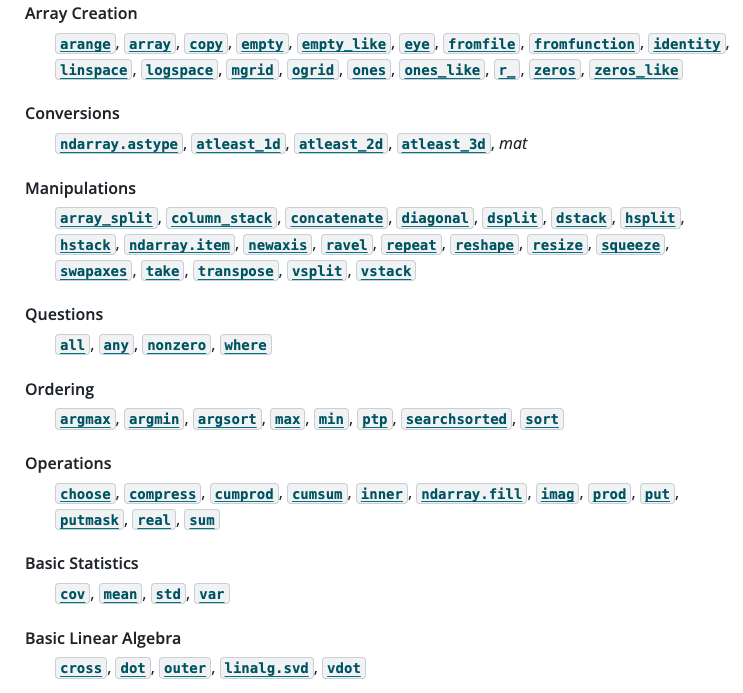

### Example: sinusoidal signals

In [ ]:
atheta = np.linspace(-np.pi, np.pi,20)
acos = np.cos(atheta)
asin = np.sin(atheta) + 0.5 # We add an offset

print(acos)

In [ ]:
from matplotlib import pyplot as plt # We'll talk more about 
                                     # plotting in the next lecture

#           x-axis    y-axis
plt.scatter(atheta,   acos,                  label="cos(x)")
plt.scatter(atheta,   asin,                  label="sin(x) + 0.5")
plt.plot   (atheta,   np.zeros(atheta.size)) # Draw a line at y==0

plt.legend(loc='upper left')

#### Get the maximum values of asin and acos

In [ ]:
cosmax = np.max(acos) 
sinmax = np.max(asin)
print(f"{cosmax=:.3f}, {sinmax=:.3f}")

#### Get the value of asin where the value of acos is max

In [ ]:
imaxcos = np.argmax(acos) # Note: this gives you the *first* occurrence of the maximum value!
sinval = asin[imaxcos]
print(f"Value of asin when acos is max: {sinval:.3f} at index i={imaxcos}")

#### Select only the positive values of acos

In [ ]:
acos[np.where(acos>0)]

#### Select the values of atheta, asin and acos in the range where acos is positive 

In [ ]:
isel = np.where(acos > 0)
athetasel = atheta[isel]
asinsel = asin[isel]
acossel = acos[isel]

# Plot old arrays
plt.scatter(atheta,   acos,                  label="cos(x)")
plt.scatter(atheta,   asin,                  label="sin(x) + 0.5")
plt.plot   (atheta,   np.zeros(atheta.size)) # Draw a line at y=0

# Plot new selected values as large circles
#           x-axis      y-axis
plt.scatter(athetasel,  acossel, alpha=0.5, s=200)
plt.scatter(athetasel,  asinsel, alpha=0.5, s=200)              

plt.legend(loc='upper left')

#### Create a "truncated" array with only the negative values of acos, and zeroes otherwise  

In [ ]:
atrunc = acos.copy() # copy the original cosine array

isel = np.where(acos > 0)
atrunc[isel] = 0 # replace positive elements with zero


plt.scatter(atheta, acos, label="Normal cosine")  # Plot old array
plt.scatter(atheta, atrunc, label="Truncated cosine")  # Plot the new truncated array

plt.legend(loc='upper left')

### A note on `copy()`:

In [ ]:
# Use id() to get a unique identifier for the array
arr1 = np.array([1,0,-3])
print(arr1)
print(id(arr1))

In [ ]:
print("Case 1:")
arr1 = np.array([1,0,-3])
arr2 = arr1
print(np.all(arr1 == arr2)) # Same values in the array
print(id(arr2) == id(arr1)) # Same location in memory.
                            # This means arr1 and arr2 are
                            # actually references to the same 
                            # array, and if I change arr2, I
                            # will also be changing arr1!

print("Case 2:")
arr3 = np.array([1,0,-3])
arr4 = arr3.copy()
print(np.all(arr3 == arr4)) # Same values in the array
print(id(arr3) == id(arr4)) # Different locations in memory
                            # (I've truly created a new array)

print("Case 3:")
arr5 = np.array([1,0,-3])
arr6 = arr5 * 1             # Here I operated on the array
print(np.all(arr5 == arr6)) # Same values in the array (because
                            # I just multiplied by 1.0)
print(id(arr5) == id(arr6)) # Different locations in memory.
                            # Because I've "changed" the 
                            # original array, python creates a 
                            # new array, just like with copy()                            

### There are many useful functions in the numpy package. 
When you're faced with a new task, check the numpy documentation online, ChatGPT, Stackoverflow, etc because there may be a function out there that does the job faster!

In the example we just saw:

In [ ]:
newarr = np.clip(acos, -1, 0)

plt.scatter(atheta, acos, label="Normal cosine")  # Plot old array
plt.scatter(atheta, newarr, label="Truncated cosine")  # Plot the new truncated array

## Saving and loading arrays

In [ ]:
energy_arr = np.linspace(3,9,15)              
spectrum_arr = 100 - energy_arr * 3

plt.scatter(energy_arr, spectrum_arr)

The next line creates a file called `myspectrum.csv` and saves the content of the arrays into it.

By zipping the two arrays we write them into the file as columns rather than lines, which makes the file easier to understand if you open it with a text editor.

In [ ]:
np.savetxt("myspectrum.csv", list(zip(energy_arr, spectrum_arr)), fmt='%.3e', delimiter=',')

The next line reads the data from the file `myspectrum.csv` and loads it back into numpy arrays.

Setting `unpack=True` is a useful trick that makes it possible to save the two columns of the file separately into different numpy arrays, in this case called `specx` and `specy`.

In [ ]:
specx, specy = np.loadtxt("myspectrum.csv", delimiter=',', unpack=True)

plt.scatter(specx, specy)

## Random numbers with numpy

We can easily generate random numbers with numpy using the `numpy.random` module.

In [ ]:
random_integers  = np.random.randint(400,500,15)
print(random_integers)

In [ ]:
random_floats_1d = np.random.rand(15) # 1D array of random floating point 
                                      # numbers between 0 and 1.
                                      # Every time you re-run this cell,
                                      # you'll be creating a new set of 
                                      # pseudo-random numbers
print(random_floats_1d)

In [ ]:
random_floats_2d = np.random.rand(3,6) # 2D array of random floating point 
                                       # numbers between 0 and 1
print(random_floats_2d)

### Seeding:

To make your experiment reproducible, you may want to *seed* the random numbers you produce:

In [ ]:
np.random.seed(10) # This fixes the random numbers that are produced next

random_but_predictable = np.random.rand(3,3) # If you re-run this cell, these 
                                             # values won't change
print(random_but_predictable)

### Exercise with random numbers:  

Write a function that estimates the value of $\pi$ with a Monte Carlo approach:

- First, we want to create a random set of $n$ points distributed randomly inside a 2x2 square, so with x- and y- coordinates between 0 and 2.
- Then we count how many of these points lie inside a circle of radius 1 centered in the middle of the square.
- Because our points are randomly distributed, the ratio between the fraction of points that lie inside the circle gives you an estimate of the ratio between the area of the circle and the total area of the square:

$$
\frac{N_\rm{inside}}{N_\rm{total}} = \frac{A_\bigodot}{A_\square} = \frac{\pi}{4}
$$

In [ ]:
def approxpi(n, seed=0):
    """Estimates an approximate value of pi with a Monte Carlo approach.
    
    Args:
        n (int): number of points to scatter
        seed (int): random seed  
        
    Return:
        piapprox (float): estimate of the value of pi.
    """
    np.random.seed(seed)            # Ensures result is reproducible
    xarr = np.random.rand(n) * 2    # x coordinates
    yarr = np.random.rand(n) * 2    # y coordinates
    dist2arr = ((xarr - 1.0) ** 2 + # Distance (squared) of each point to the center
                (yarr - 1.0) ** 2
               )
    isincirc = dist2arr <= 1        # True for points in the circle, False for out
    incount = np.sum(isincirc)      # Number of points inside the circle 
                                    # (remember that True acts as 1, False as 0)
    piapprox = 4 * incount / n      
    return piapprox

print("With a million points, pi~", approxpi(1000000))